In [6]:
%matplotlib inline

import numpy as np
import pandas as pd

# Make inline plots vector graphics instead of raster graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper")

import mpld3
#mpld3.enable_notebook()
#mpld3.disable_notebook()

year       1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                         
January     112   115   145   171   196   204   242   284   315   340   360   
February    118   126   150   180   196   188   233   277   301   318   342   
March       132   141   178   193   236   235   267   317   356   362   406   
April       129   135   163   181   235   227   269   313   348   348   396   
May         121   125   172   183   229   234   270   318   355   363   420   
June        135   149   178   218   243   264   315   374   422   435   472   
July        148   170   199   230   264   302   364   413   465   491   548   
August      148   170   199   242   272   293   347   405   467   505   559   
September   136   158   184   209   237   259   312   355   404   404   463   
October     119   133   162   191   211   229   274   306   347   359   407   
November    104   114   146   172   180   203   237 

/Users/kasper/anaconda/envs/py3/lib/python3.5/site-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/Users/kasper/anaconda/envs/py3/lib/python3.5/site-packages/pandas/core/categorical.py:96: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  return getattr(np.array(self), op)(np.array(other))


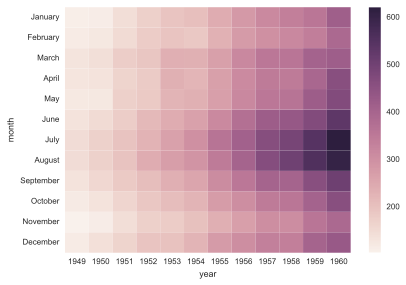

In [64]:
flights = sns.load_dataset("flights")
flights = flights.pivot(index="month", columns="year", values="passengers")
print(flights)
ax = sns.heatmap(flights)

# melt == gather

In [55]:
df = pd.DataFrame({'chrom':['chr1']*2+['chr2']*2, 'pos':list(range(2))+list(range(2)), 'A':range(4), 'B':range(4)})
print(df)
# high = pd.melt(df, id_vars=['chrom', 'pos'])
# print(high)
high = pd.melt(df, id_vars=['chrom', 'pos'], value_vars=['A', 'B'], 
               var_name='population', value_name='measurement')
print(high)

   A  B chrom  pos
0  0  0  chr1    0
1  1  1  chr1    1
2  2  2  chr2    0
3  3  3  chr2    1
  chrom  pos population  measurement
0  chr1    0          A            0
1  chr1    1          A            1
2  chr2    0          A            2
3  chr2    1          A            3
4  chr1    0          B            0
5  chr1    1          B            1
6  chr2    0          B            2
7  chr2    1          B            3


AttributeError: 'DataFrame' object has no attribute 'melt'

# pivot_table == spread

In [3]:
print(pd.pivot_table(high,index=["chrom","pos"], 
                     columns=['population'], 
                     values=['measurement']))


           measurement   
population           A  B
chrom pos                
chr1  0              0  0
      1              1  1
chr2  0              2  2
      1              3  3


# assign == mutate

In [4]:
print(high.assign(log_measurement = lambda x: np.log(x.measurement)))

  chrom  pos population  measurement  log_measurement
0  chr1    0          A            0             -inf
1  chr1    1          A            1         0.000000
2  chr2    0          A            2         0.693147
3  chr2    1          A            3         1.098612
4  chr1    0          B            0             -inf
5  chr1    1          B            1         0.000000
6  chr2    0          B            2         0.693147
7  chr2    1          B            3         1.098612


/Users/kasper/anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


# aggregate == summarize

In [5]:
def length(df):
    return len(df.index)
    
result = (high[['chrom', 'population', 'measurement']]
      .groupby(['chrom', 'population'])
      .aggregate([np.mean, np.var, length])
     )
print(result)

                 measurement            
                        mean  var length
chrom population                        
chr1  A                  0.5  0.5      2
      B                  0.5  0.5      2
chr2  A                  2.5  0.5      2
      B                  2.5  0.5      2


# key access == select

In [6]:
cols = ['chrom', 'pos']
print(high[cols])

  chrom  pos
0  chr1    0
1  chr1    1
2  chr2    0
3  chr2    1
4  chr1    0
5  chr1    1
6  chr2    0
7  chr2    1


# .loc == filter and access rows

In [7]:
print(high.loc[1:3]) # slice
print(high.loc[range(2)]) # generator
print(high.loc[ high['chrom'] == 'chr1' ])

  chrom  pos population  measurement
1  chr1    1          A            1
2  chr2    0          A            2
3  chr2    1          A            3
  chrom  pos population  measurement
0  chr1    0          A            0
1  chr1    1          A            1
  chrom  pos population  measurement
0  chr1    0          A            0
1  chr1    1          A            1
4  chr1    0          B            0
5  chr1    1          B            1


In [8]:
stats = (pd.melt(df, 
                 id_vars=['chrom', 'pos'], 
                 value_vars=['A', 'B'], 
                 var_name='population', value_name='measurement')
# .loc[lambda x: x.measurement >= 1]           # filter rows on the fly
 .get(['chrom', 'population', 'measurement']) # filter cols on the fly
 .groupby(['chrom', 'population'])
 .aggregate([np.mean, np.var, length])
)

print(stats)
print(stats.reset_index())

def flatten_column_multi_index(df):
    df.columns = ['_'.join(col).strip() for col in df.columns.values]

flatten_column_multi_index(stats)
print(stats)
print(stats.reset_index())

                 measurement            
                        mean  var length
chrom population                        
chr1  A                  0.5  0.5      2
      B                  0.5  0.5      2
chr2  A                  2.5  0.5      2
      B                  2.5  0.5      2
  chrom population measurement            
                          mean  var length
0  chr1          A         0.5  0.5      2
1  chr1          B         0.5  0.5      2
2  chr2          A         2.5  0.5      2
3  chr2          B         2.5  0.5      2
                  measurement_mean  measurement_var  measurement_length
chrom population                                                       
chr1  A                        0.5              0.5                   2
      B                        0.5              0.5                   2
chr2  A                        2.5              0.5                   2
      B                        2.5              0.5                   2
  chrom population  mea

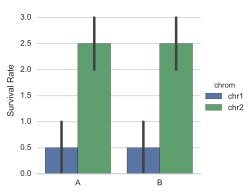

In [50]:
g = sns.factorplot(data=high.reset_index(), 
               x='population', 
               y='measurement', 
#               col='chrom', 
#               row='population',
               hue='chrom',
               kind='bar',
               size=3, 
               aspect=1)

(g.set_axis_labels("", "Survival Rate")
#    .set_xticklabels(["Men", "Wo"])
#    .set_titles("{col_name} in {row_var} {row_name}")
    .set(ylim=(0, 3.2))
    .despine(left=True))  

plt.show()